In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn.functional as F #functional API containing ready to use math operation
import torch.nn as nn           #nn module to create layers, activation functions
import matplotlib.pyplot as plt

**Logistic** Regression is a single-layer neural network with sigmoid activation.

# TWO CLASS LOGISTIC REGRESSION

In [2]:
class LogisticRegression(nn.Module): #creating a neural network model for Logistic Regression
  def __init__(self, input_features): #constructor called when model is created
    super(LogisticRegression, self).__init__()
    #self.linear -> linear layer belonging to this model
    self.linear = nn.Linear(input_features, 1) #output features is 1 since its binary classification problem #z = wx+b //logits

  def forward(self, x):
    logits = self.linear(x) #produces z = wx+b
    return logits

In [3]:
from sklearn.datasets import make_moons

In [4]:
X, y = make_moons(n_samples=100, noise=0.1)

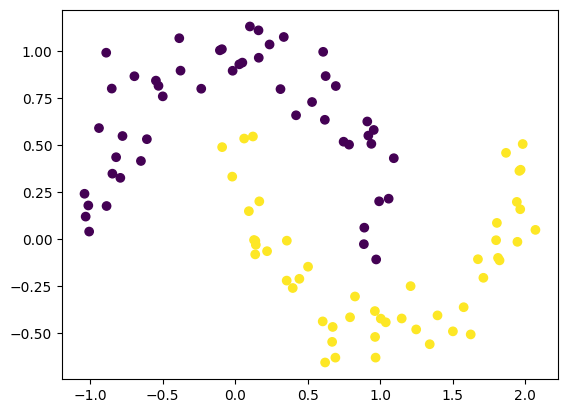

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y) #two classes, cmap = plt.cm. #c=y -> color by class

In [6]:
log_reg = LogisticRegression(2) #2-> each sample has two features, internally it creates z = w1x1 + w2x2 + b

In [7]:
log_reg.linear.weight, log_reg.linear.bias #pytorch initialses weights and biases randomly so we are checking that

(Parameter containing:
 tensor([[0.6598, 0.4350]], requires_grad=True),
 Parameter containing:
 tensor([0.4206], requires_grad=True))

In [8]:
log_reg(torch.tensor([[1, 0.0]])) #Model, what's your opinion about this point? -> Ans : Logit(raw score) #(1,2)

tensor([[1.0805]], grad_fn=<AddmmBackward0>)

- Created fake classification data
- Built a logistic regression model
- Looked at its internal parameters
- Passed a sample input

Right now:

Model is untrained ❌
So output is random.

Later during training:
Weights change → logits become meaningful → sigmoid → probability

/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4381.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


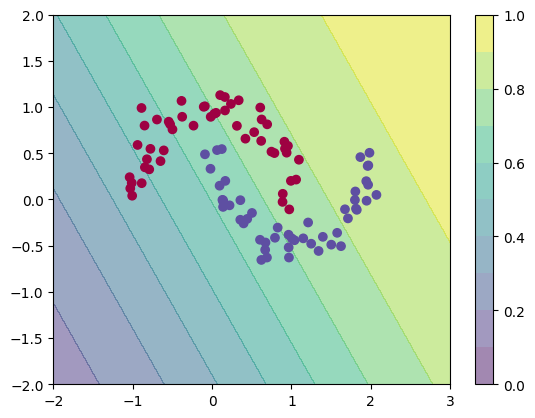

In [9]:
# Model Prediction Visualization (before training)

def predict_plot_grid(model):
    XX, YY = torch.meshgrid(torch.linspace(-2, 3, 100), torch.linspace(-2, 2, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    logits = model(X_grid)
    probs = torch.sigmoid(logits).reshape(100, 100)

    plt.contourf(XX, YY, probs.detach().numpy(), levels=[0.0, 0.1, 0.2,0.3, 0.4,0.5, 0.6,0.7, 0.8,0.9, 1.0], alpha = 0.5)
    plt.colorbar()

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) #take all the rows from col 1 (row), take all the rows from col 2(cols)
                                                              #color each point based on its label -> class 0 gets one color, class 1 gets another color

predict_plot_grid(log_reg)

In [10]:
#Model Training Part
''''Earlier:
Model had random weights → bad boundary

Now:
We adjust weights so predictions match true labels.

This loop = learning from mistakes.'''

opt = torch.optim.Adam(log_reg.parameters(), lr=0.01)

converged = False
prev_loss = 1e8
i = 0
while not converged:
    opt.zero_grad()
    logits = log_reg(torch.tensor(X, dtype=torch.float32))
    loss = nn.BCEWithLogitsLoss()(logits, torch.tensor(y, dtype=torch.float32).view(-1, 1))
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item()
    i = i + 1

0 0.7281186580657959
10 0.6807365417480469
20 0.638426661491394
30 0.6014910936355591
40 0.5697866082191467
50 0.5428558588027954
60 0.5200914144515991
70 0.5008580088615417
80 0.48456019163131714
90 0.4706721901893616
100 0.45874565839767456
110 0.4484080374240875
120 0.43935519456863403
130 0.43134161829948425
140 0.4241710603237152
150 0.41768717765808105
160 0.41176602244377136
170 0.40630874037742615
180 0.4012373983860016
190 0.3964899480342865
200 0.3920172154903412
210 0.3877800703048706
220 0.3837476670742035
230 0.3798953890800476
240 0.3762035369873047
250 0.3726566433906555
260 0.3692421317100525
270 0.3659501373767853
280 0.3627724051475525
290 0.3597024977207184
300 0.3567349314689636
310 0.3538651168346405
320 0.3510892987251282
330 0.3484039306640625
340 0.34580621123313904
350 0.34329327940940857
360 0.3408626914024353
370 0.33851203322410583
380 0.3362390995025635
390 0.33404162526130676
400 0.33191749453544617
410 0.32986465096473694
420 0.32788100838661194
430 0.325

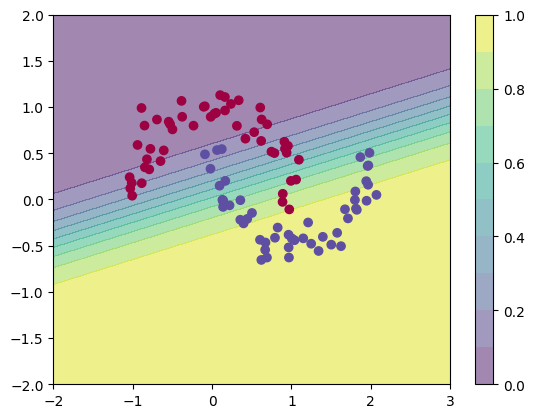

In [11]:
predict_plot_grid(log_reg)

Optimizer comparison :

1. SGD (Basic Gradient Descent)
    Moves directly using gradient.

    Problems:

    - Slow
    - Oscillates
    - Needs careful lr tuning

2. SGD + Momentum

    - Better than SGD.
    - Remembers past direction.
    - Still not adaptive per weight.

3. RMSProp

     - Adapts learning rate.
     - But no strong momentum memory.

4. Adam

      Combines:
    - Momentum + Adaptive LR
    - Fastest to converge
    - Most stable

# MULTI CLASS LOGISTIC REGRESSION

In [12]:
from sklearn.datasets import load_iris
iris_data = load_iris()

#print(iris_data)

In [13]:
X = iris_data.data
#X
y = iris_data.target
#y.reshape(-1,1)

Text(0, 0.5, 'Sepal width')

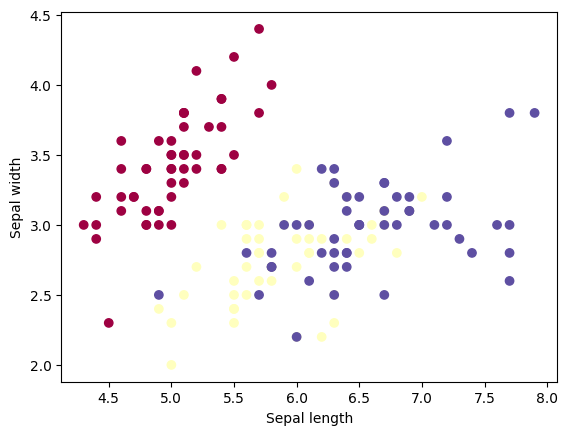

In [14]:
#Visualization of untrained data
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Spectral)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [15]:
class ThreeClassLogisticRegression(nn.Module):
  def __init__(self, input_features):

    super(ThreeClassLogisticRegression, self).__init__()
    self.linear1 = nn.Linear(input_features, 1)
    self.linear2 = nn.Linear(input_features, 1)
    self.linear3 = nn.Linear(input_features, 1)

  def forward(self, x):

    logits1 = self.linear1(x)
    logits2 = self.linear2(x)
    logits3 = self.linear3(x)
    return torch.cat([logits1, logits2, logits3], dim = -1)

class MultiClassLogisticRegression(nn.Module):
  def __init__(self, input_features, n_classes):

    super(MultiClassLogisticRegression, self).__init__()
    self.linear = nn.Linear(input_features, n_classes) #linear layer producing multiple logits

  def forward(self, x):
    logits = self.linear(x)
    return logits

In [16]:
multi_class_lr = ThreeClassLogisticRegression(2) #2-> no of input features (Sepal length and Sepal width)

In [17]:
X_tensor = torch.tensor(X, dtype=torch.float32)[:,:2]
y_tensor = torch.tensor(y, dtype=torch.long)

In [18]:
X_tensor.shape

torch.Size([150, 2])

In [19]:
multi_class_lr(X_tensor).shape

torch.Size([150, 3])

In [20]:
multi_class_lr_efficient = MultiClassLogisticRegression(2, 3)
multi_class_lr_efficient(X_tensor).shape

torch.Size([150, 3])

In [21]:
multi_class_lr_efficient(X_tensor[:5])

tensor([[-0.3150,  3.6407, -0.8271],
        [-0.2383,  3.4093, -0.8700],
        [-0.2604,  3.3579, -0.8053],
        [-0.2433,  3.2808, -0.8037],
        [-0.3260,  3.6150, -0.7947]], grad_fn=<AddmmBackward0>)

In [22]:
z1 = 1.9915
z2 = 3.4042
z3 = 2.3162

e_z1 = np.exp(z1)
e_z2 = np.exp(z2)
e_z3 = np.exp(z3)

p1 = e_z1/(e_z1 + e_z2 + e_z3)
p2 = e_z2/(e_z1 + e_z2 + e_z3)
p3 = e_z3/(e_z1 + e_z2 + e_z3)
print(p1, p2, p3)

0.1540678948567025 0.6327613779116927 0.21317072723160485


In [23]:
nn.Softmax(dim=-1)(multi_class_lr_efficient(X_tensor[:5]))

tensor([[0.0186, 0.9703, 0.0111],
        [0.0251, 0.9616, 0.0133],
        [0.0257, 0.9593, 0.0149],
        [0.0282, 0.9557, 0.0161],
        [0.0188, 0.9694, 0.0118]], grad_fn=<SoftmaxBackward0>)

In [24]:

nn.Softmax(dim=-1)(multi_class_lr_efficient(X_tensor[:5])).sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

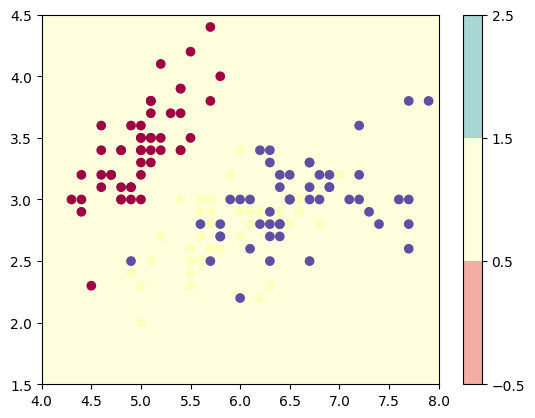

In [25]:
def plot_most_probable_class(model):
    XX, YY = torch.meshgrid(torch.linspace(4, 8, 100), torch.linspace(1.5, 4.5, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    logits = model(X_grid)
    predicted_class = torch.argmax(logits, dim=-1)
    plt.contourf(XX, YY, predicted_class.reshape(100, 100).detach().numpy(), levels=[-0.5, 0.5, 1.5, 2.5],
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

plot_most_probable_class(multi_class_lr_efficient)

In [26]:
logits = multi_class_lr_efficient(X_tensor)
nn.Softmax(dim=-1)(logits[:5])

tensor([[0.0186, 0.9703, 0.0111],
        [0.0251, 0.9616, 0.0133],
        [0.0257, 0.9593, 0.0149],
        [0.0282, 0.9557, 0.0161],
        [0.0188, 0.9694, 0.0118]], grad_fn=<SoftmaxBackward0>)

In [27]:
y_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [28]:
#multi_class_lr_efficient.parameters()

In [29]:
opt = torch.optim.Adam(multi_class_lr_efficient.parameters(), lr = 0.01)

converged = False
prev_loss = 1e8

i = 0
while not converged:
  opt.zero_grad()
  logits = multi_class_lr_efficient(X_tensor)
  loss = F.cross_entropy(logits, y_tensor)
  loss.backward() #Backward pass -> calculates gradient wrt to all parameters (here, w and b)
  opt.step() #updates weight

  if i%10==0:
    print(i, loss.item())

  if np.abs(prev_loss - loss.item()) < 1e-5:
    converged = True
  prev_loss = loss.item()
  i +=1

0 3.1270527839660645
10 1.9314963817596436
20 1.2384876012802124
30 1.1298811435699463
40 1.1311417818069458
50 1.097719669342041
60 1.073127031326294
70 1.0595625638961792
80 1.04249107837677
90 1.0264599323272705
100 1.0104674100875854
110 0.9944255352020264
120 0.9785633087158203
130 0.9628850221633911
140 0.9474803805351257
150 0.9323961138725281
160 0.9176766872406006
170 0.90335613489151
180 0.8894581198692322
190 0.8759991526603699
200 0.8629887700080872
210 0.8504312634468079
220 0.8383260369300842
230 0.8266680836677551
240 0.8154503107070923
250 0.8046625852584839
260 0.7942932844161987
270 0.7843288779258728
280 0.7747558355331421
290 0.7655589580535889
300 0.7567233443260193
310 0.7482340931892395
320 0.7400757074356079
330 0.7322338819503784
340 0.724693775177002
350 0.7174413800239563
360 0.7104629874229431
370 0.7037455439567566
380 0.6972764134407043
390 0.6910436153411865
400 0.6850355267524719
410 0.6792412400245667
420 0.6736503839492798
430 0.6682531237602234
440 0.

In [30]:
multi_class_lr_efficient(X_tensor[:5])

tensor([[ 3.9808, -1.2552, -2.8617],
        [ 1.8780, -0.2698, -2.4051],
        [ 4.0265, -0.8984, -3.2812],
        [ 3.8861, -0.7515, -3.3384],
        [ 5.0550, -1.5695, -3.2997]], grad_fn=<AddmmBackward0>)

In [31]:
pred = F.softmax(multi_class_lr_efficient(X_tensor), dim=-1).detach().numpy()
pd.DataFrame(pred)

,0,1,2
0,0.993652,0.005288,0.001061
1,0.884532,0.103263,0.012206
2,0.992129,0.007206,0.000665
3,0.989698,0.009581,0.000721
4,0.998440,0.001325,0.000235
...,...,...,...
145,0.000130,0.306716,0.693154
146,0.000030,0.510346,0.489624
147,0.000486,0.380303,0.619211
148,0.080651,0.423766,0.495584


In [32]:
df = pd.DataFrame(pred, columns=iris_data.target_names)
df["Ground_truth"] = iris_data.target
df

,setosa,versicolor,virginica,Ground_truth
0,0.993652,0.005288,0.001061,0
1,0.884532,0.103263,0.012206,0
2,0.992129,0.007206,0.000665,0
3,0.989698,0.009581,0.000721,0
4,0.998440,0.001325,0.000235,0
...,...,...,...,...
145,0.000130,0.306716,0.693154,2
146,0.000030,0.510346,0.489624,2
147,0.000486,0.380303,0.619211,2
148,0.080651,0.423766,0.495584,2


In [33]:
df["Predicted"] = pred.argmax(axis=1)
df

,setosa,versicolor,virginica,Ground_truth,Predicted
0,0.993652,0.005288,0.001061,0,0
1,0.884532,0.103263,0.012206,0,0
2,0.992129,0.007206,0.000665,0,0
3,0.989698,0.009581,0.000721,0,0
4,0.998440,0.001325,0.000235,0,0
...,...,...,...,...,...
145,0.000130,0.306716,0.693154,2,2
146,0.000030,0.510346,0.489624,2,1
147,0.000486,0.380303,0.619211,2,2
148,0.080651,0.423766,0.495584,2,2


In [38]:
# Accuracy
((pred.argmax(axis = 1) == iris_data.target)).mean()

np.float64(0.8266666666666667)

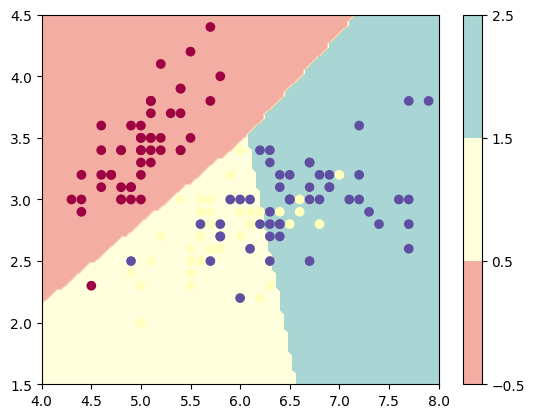

In [39]:
plot_most_probable_class(multi_class_lr_efficient)